## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

**Boston_dataset is a dictionary. let's check what it contains**


In [4]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Load the data into pandas dataframe**

In [11]:
df = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [12]:
df['MEDV'] = boston_dataset['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data preprocessing**

Check for missing values in all the columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


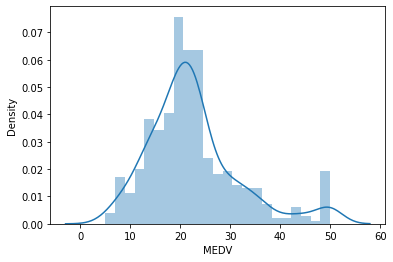

In [17]:
sns.distplot(df['MEDV']);

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

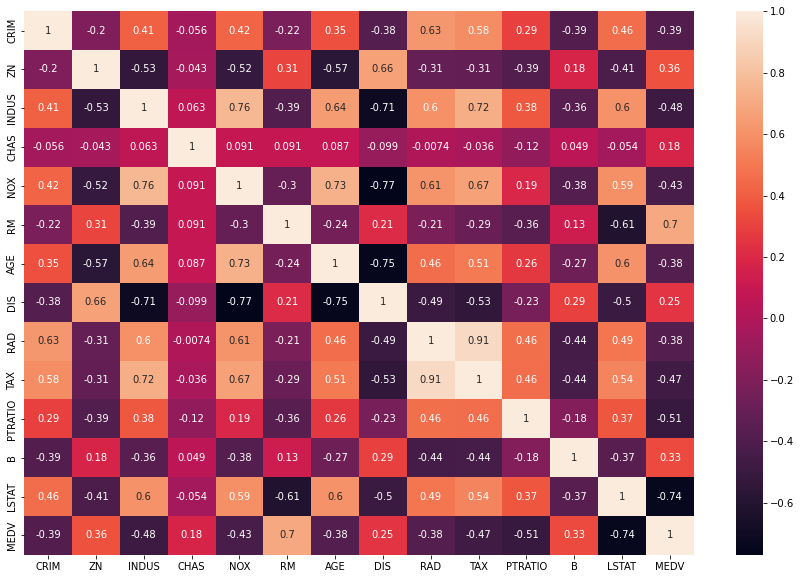

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True);

* LSTAT y RM son las variables más correladas con el target.

In [20]:
df.drop(columns=['RAD'], inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


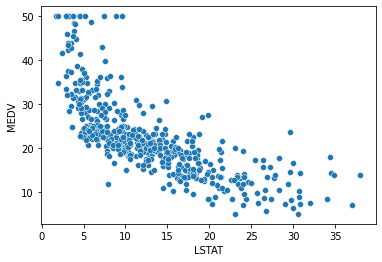

In [22]:
sns.scatterplot(df['LSTAT'], df['MEDV']);

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


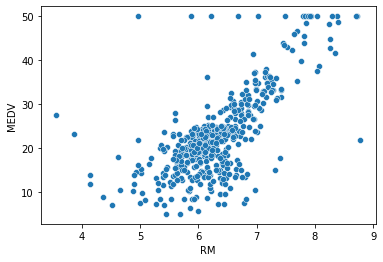

In [23]:
sns.scatterplot(df['RM'], df['MEDV']);

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [25]:
X = df[['LSTAT', 'RM']]
y = df['M']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
lin_reg.score(X_train, y_train)

0.6363353379616082

In [53]:
predictions = lin_reg.predict(X_test)

**Evaluate the model performance in the training and testing sets**

In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

print("MAE test", mean_absolute_error(y_test, predictions))
print("MAPE test", mean_absolute_percentage_error(y_test, predictions))
print("MSE test", mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(mean_squared_error(y_test, predictions)))

MAE test 4.582645892343417
MAPE test 0.1965019924576172
MSE test 41.402023411523814
RMSE test 6.434440411684905


In [55]:
train_predictions = lin_reg.predict(X_train)

print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MAPE train", mean_absolute_percentage_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))
print("RMSE train", np.sqrt(mean_squared_error(y_train, train_predictions)))

MAE train 3.798063422689011
MAPE train 0.2048835131986116
MSE train 27.98794118547948
RMSE train 5.2903630485515345


In [56]:
r2_score(y_train, train_predictions)

0.6363353379616082

**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MEDV'>

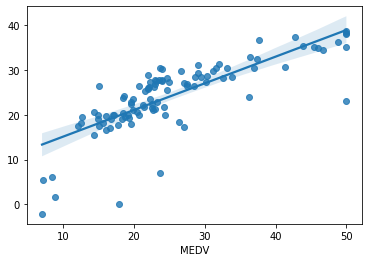

In [39]:
sns.regplot(y_test, predictions)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)

pol_reg_2 = LinearRegression()
pol_reg_2.fit(X_train_poly, y_train)


LinearRegression()

In [64]:
pol_reg_2.score(X_train_poly,y_train)

0.7526744600340032

In [61]:
X_test_poly = poly_reg.transform(X_test)
predictions = pol_reg_2.predict(X_test_poly)

**Did the model improve using the Polynomial model?**

In [62]:
print("MAE test", mean_absolute_error(y_test, predictions))
print("MAPE test", mean_absolute_percentage_error(y_test, predictions))
print("MSE test", mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(mean_squared_error(y_test, predictions)))

MAE test 3.5422408760579454
MAPE test 0.15762773773884922
MSE test 26.301979732039726
RMSE test 5.128545576675684


In [63]:
train_predictions = pol_reg_2.predict(X_train_poly)

print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MAPE train", mean_absolute_percentage_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))
print("RMSE train", np.sqrt(mean_squared_error(y_train, train_predictions)))

MAE train 3.0194990832234496
MAPE train 0.16173951863102592
MSE train 19.034383564891193
RMSE train 4.362841226184056


**Did the model improve using the Polynomial model with degree 3? Or more?**

In [65]:
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_train_poly, y_train)

LinearRegression()

In [66]:
pol_reg_3.score(X_train_poly,y_train)

0.768816576577862

In [68]:
X_test_poly = poly_reg.transform(X_test)
predictions = pol_reg_3.predict(X_test_poly)

In [69]:
print("MAE test", mean_absolute_error(y_test, predictions))
print("MAPE test", mean_absolute_percentage_error(y_test, predictions))
print("MSE test", mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(mean_squared_error(y_test, predictions)))

MAE test 3.542002179092319
MAPE test 0.1536922223195888
MSE test 26.096535312446964
RMSE test 5.108476809426364


In [70]:
train_predictions = pol_reg_3.predict(X_train_poly)

print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MAPE train", mean_absolute_percentage_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))
print("RMSE train", np.sqrt(mean_squared_error(y_train, train_predictions)))

MAE train 2.908202831712579
MAPE train 0.15751889391939244
MSE train 17.792072569078847
RMSE train 4.218065026653672


In [71]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)

pol_reg_4 = LinearRegression()
pol_reg_4.fit(X_train_poly, y_train)

LinearRegression()

In [72]:
pol_reg_4.score(X_train_poly,y_train)

0.8115227871427634

In [73]:
X_test_poly = poly_reg.transform(X_test)
predictions = pol_reg_4.predict(X_test_poly)

In [74]:
print("MAE test", mean_absolute_error(y_test, predictions))
print("MAPE test", mean_absolute_percentage_error(y_test, predictions))
print("MSE test", mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(mean_squared_error(y_test, predictions)))

MAE test 3.8712993275305707
MAPE test 0.17216853404804283
MSE test 34.6368988373572
RMSE test 5.885312127437015


In [76]:
train_predictions = pol_reg_4.predict(X_train_poly)

print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MAPE train", mean_absolute_percentage_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))
print("RMSE train", np.sqrt(mean_squared_error(y_train, train_predictions)))

MAE train 2.7002309953736607
MAPE train 0.1506711343208499
MSE train 14.50536634129865
RMSE train 3.808591122882404
